In [11]:
# -*- coding: utf-8 -*-
## k-means algorithm
""" Alexander I. Iliev modified on Oct.30.2021

Example Using Knee/Elbow plot - in TF v1.X 
==========================================

Intro: 
======
When working with k-means, the data in a training set does not need labels. 
As an unsupervised learning method, the algorithm builds clusters based on 
the data itself. """

import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [12]:
tf.sub=tf.subtract

points_n=200
iteration_n=6

points=tf.constant(np.random.uniform(0,10,(points_n,2)))
k_values=np.arange(6)+1
Var_dist=np.zeros(len(k_values))

centroids
 [[4.74001853 4.80196793]]


centroids
 [[2.48051056 4.95328977]
 [7.33966749 4.62786646]]


centroids
 [[7.67572273 3.26016287]
 [2.24977662 2.99907585]
 [4.41941241 7.77865826]]


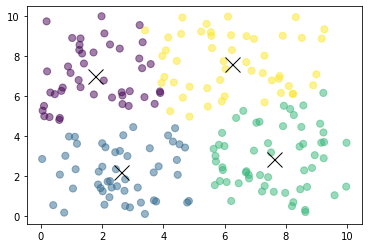

centroids
 [[1.77759798 7.0033478 ]
 [2.62915491 2.19965259]
 [7.60684808 2.87882586]
 [6.24696315 7.62098809]]


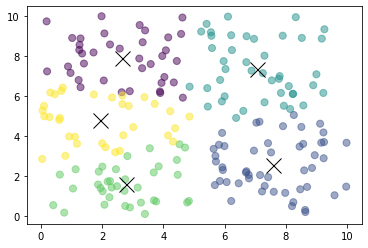

centroids
 [[2.66208515 7.88113733]
 [7.58259241 2.56964502]
 [7.06838817 7.3517542 ]
 [2.77074219 1.6191864 ]
 [1.94022544 4.78824168]]


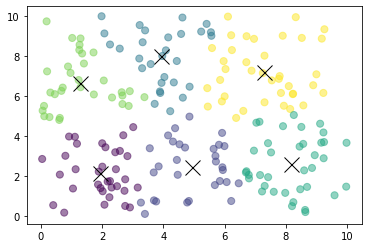

centroids
 [[1.93129537 2.17582326]
 [4.9186237  2.45220474]
 [3.93320901 7.97381169]
 [8.16799802 2.5917826 ]
 [1.28692148 6.65772037]
 [7.29790729 7.17541855]]


In [13]:
for k in k_values:
    clusters_n=k
    
    # 1. Let’s generate random data points with a uniform distribution and assign them 
    #    to a 2D tensor constant. Then, randomly choose initial centroids from the set 
    #    of data points:
    centroids=tf.Variable(tf.slice(tf.random_shuffle(points),[0,0],[clusters_n,-1]))

    # 2. Next we want to be able to do element-wise subtraction of points and centroids 
    #    that are 2D tensors. Because the tensors have different shape, let’s expend points 
    #    and centroids into 3 dimensions, which allows us to use the broadcasting feature of 
    #    subtraction operation:
    points_expanded=tf.expand_dims(points,0)
    centroids_expanded=tf.expand_dims(centroids,1)
    
    # 3. Then, calculate the distances between points and centroids and determine the 
    #    cluster assignments:
    distances=tf.reduce_sum(tf.square(tf.sub(points_expanded,centroids_expanded)),2)
    assignments=tf.argmin(distances,0)
    means=[]
    for c in range(clusters_n):
        means.append(tf.reduce_mean(tf.gather(points,tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),reduction_indices=[1]))

    # 4. Next, we can compare each cluster with a cluster assignments vector, get points 
    #    assigned to each cluster, and calculate mean values. These mean values are refined 
    #    centroids, so let’s update the centroids variable with the new values:
    new_centroids=tf.concat(means,0)    
    update_centroids=tf.assign(centroids,new_centroids)    
    init=tf.global_variables_initializer()
    
    # 5. Next we run the graph. For each iteration, we update the centroids and return 
    #    their values along with the cluster assignments values:
    with tf.Session() as sess:
        sess.run(init)
        for step in range(iteration_n):
            [_, centroid_values, points_values, assignment_values]=sess.run([update_centroids,centroids, points,assignments])
    
    # Plot the progress of centrod recalculation in each iteration:
    plt.scatter(points_values[:,0], points_values[:,1], c=assignment_values, s=50, alpha=0.5)
    plt.plot(centroid_values[:,0], centroid_values[:,1],'kx', markersize=15)
    plt.pause(1)

    # 6. We display the coordinates of the final centroids and a multi-colored 
    #    scatter plot showing how the data points have been clustered: 
    print("centroids" + "\n", centroid_values)
    
    # 7. We display the knee/elbow plot to determne the best # of K next:
    from scipy.spatial import distance
    dist=np.zeros(points_n)
    j=0;
    while j<k:
        for i in range(200):
            if assignment_values[i]==j:
                dist[i]=distance.euclidean(points_values[i,:],centroid_values[j])         
        j=j+1
    Var_dist[k-1]=sum(dist)

In [14]:
    # Show the distances of each point:
    print(len(dist))
    print(dist)

200
[2.03798085 2.09977218 0.54757773 1.71650327 2.36867233 0.90226471
 0.60114539 1.8457765  1.93099047 1.87180409 0.33910227 0.55299114
 0.88544586 1.92707046 0.52052444 1.47474231 2.0767792  0.98022225
 0.56956884 1.36391033 2.30465609 1.46393707 1.7611132  1.66708861
 0.774552   2.19483527 1.41434363 0.9251641  2.06071775 2.01240419
 1.73378731 2.02174722 1.53879244 1.15526894 1.73589612 1.70908872
 1.27306718 1.43376664 2.91173992 1.92544314 1.65926344 1.89815444
 1.64600725 0.85890554 1.28426328 1.35714977 2.21117318 2.0567622
 2.0342376  2.01890469 1.68530702 0.93476634 1.44640426 1.23648435
 2.11474859 1.97276993 1.74401688 1.2084576  1.140087   1.13734977
 2.52390189 1.47258508 1.88203735 0.9764885  0.90903696 0.86786237
 0.82591736 1.49216618 0.03801475 2.05830214 0.06010934 1.41737514
 1.59729796 1.41410195 1.76304532 0.96137594 1.02881497 0.78116014
 1.30018239 1.95367963 2.52193569 1.85223355 0.72690572 1.89647698
 1.2270136  1.28027314 2.11180726 0.52413568 2.10976756 2.4

[741.05539195 569.77443601 438.51420272 360.01076661 332.21539388
 301.80951377]


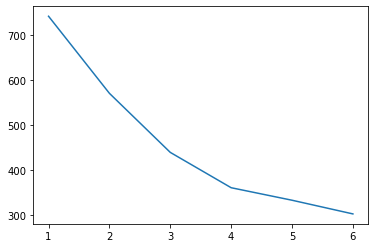

In [15]:
print(Var_dist)
plt.plot(k_values, Var_dist)
plt.show()